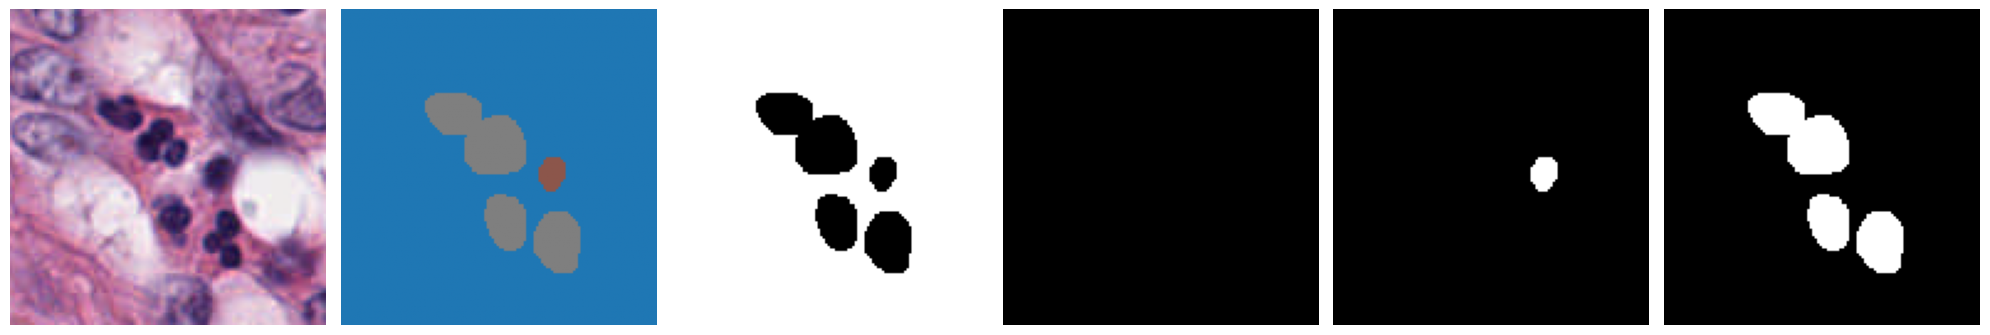

In [17]:
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt

from src.dataset import MoNuSACDataset
from src.constants import NAME_CLASS_MAPPING

class_idx_name_mapping = {i: c for (i, c) in enumerate(NAME_CLASS_MAPPING)}

dataset = MoNuSACDataset(root="./data/test/masks")
img, mask = dataset.__getitem__(57)
mask_array = np.array(mask)

num_classes = len(list(NAME_CLASS_MAPPING.values())[:-1]) + 1
_, axes = plt.subplots(1, 2 + num_classes, figsize=(20, 25))

axes[0].imshow(img, cmap="grey")
axes[0].axis("off")

im = axes[1].imshow(mask, cmap="tab10", vmin=0, vmax=4)
axes[1].axis("off")

mask_tensor = torch.tensor((mask_array)).long()
one_hot = F.one_hot(mask_tensor, num_classes) 
one_hot = one_hot.permute(2, 0, 1)

for i in range(num_classes):
    axes[2 + i].imshow(one_hot[i], cmap="grey")
    axes[2 + i].axis("off")

plt.tight_layout()
plt.show()

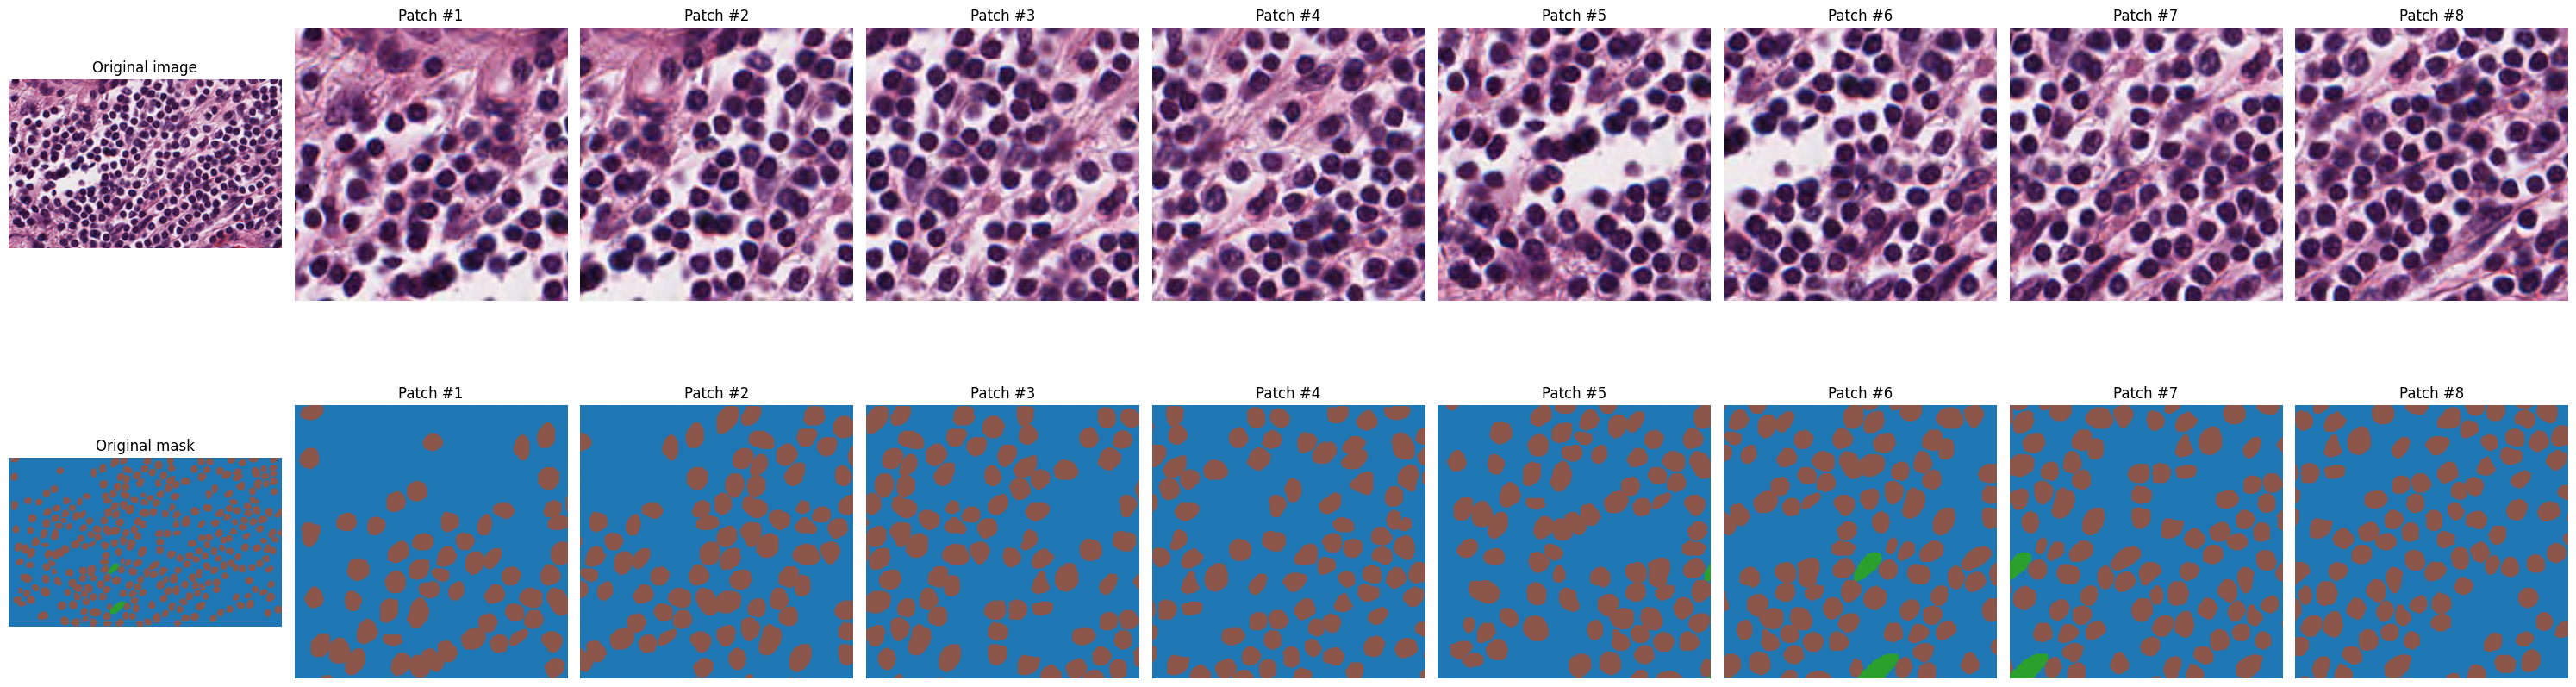

In [46]:
from src.utils import PatchExtractor
from src.dataset import MoNuSACDataset
import numpy as np
import matplotlib.pyplot as plt

extractor = PatchExtractor(min_foreground_ratio=0.1)
dataset = MoNuSACDataset(root="./data/train/masks")

img, mask = dataset.__getitem__(15)
img = np.permute_dims(np.array(img), (2, 0, 1))
mask = np.expand_dims(np.array(mask), 0)

img_patches, mask_patches = extractor.extract_patches_from_image(img, mask)
num_patches = len(img_patches)

_, axes = plt.subplots(2, 1 + num_patches if num_patches != 0 else 2, figsize=(30, 10))

img = np.permute_dims(img, (1, 2, 0))
axes[0, 0].imshow(img)
axes[0, 0].axis("off")
axes[0, 0].set_title("Original image")

if num_patches == 0:
    axes[0, 1].imshow(img)
    axes[0, 1].axis("off")
    axes[0, 1].set_title("No patches")

for i in range(0, num_patches):
    axes[0, 1 + i].imshow(np.permute_dims(img_patches[i], (1, 2, 0)))
    axes[0, 1 + i].axis("off")
    axes[0, 1 + i].set_title(f"Patch #{i + 1}")

mask = np.permute_dims(mask, (1, 2, 0))
axes[1, 0].imshow(mask, cmap="tab10", vmin=0, vmax=4)
axes[1, 0].axis("off")
axes[1, 0].set_title("Original mask")

if num_patches == 0:
    axes[1, 1].imshow(mask, cmap="tab10", vmin=0, vmax=4)
    axes[1, 1].axis("off")
    axes[1, 1].set_title("No patches")

for i in range(0, num_patches):
    mask_patch = np.permute_dims(mask_patches[i], (1, 2, 0))
    axes[1, 1 + i].imshow(mask_patch, cmap="tab10", vmin=0, vmax=4)
    axes[1, 1 + i].axis("off")
    axes[1, 1 + i].set_title(f"Patch #{i + 1}")

plt.tight_layout()
plt.show()


In [42]:
from src.dataset import MoNuSACPatchDataset

patch_dataset = MoNuSACPatchDataset(root="./data/train/masks")

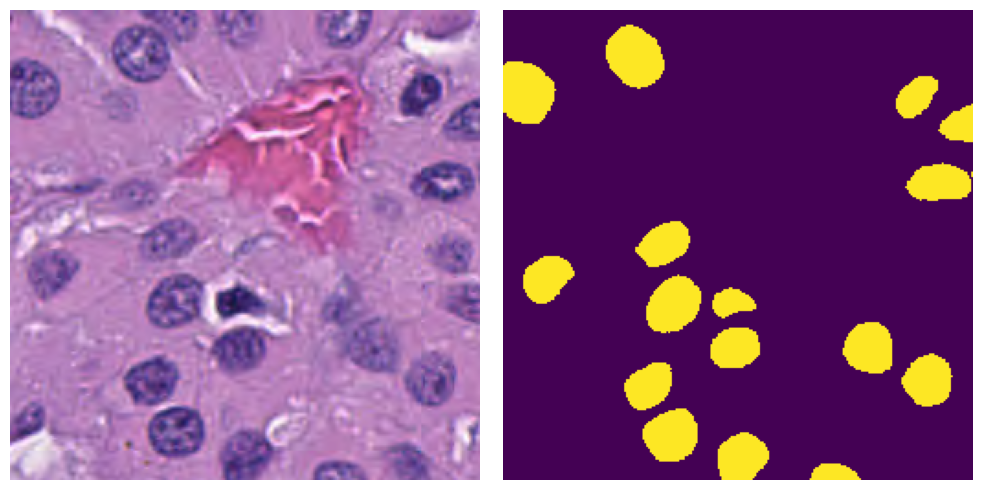

In [44]:
from src.dataset import MoNuSACPatchDataset
import matplotlib.pyplot as plt

patch_dataset = MoNuSACPatchDataset(root="./data/train/masks")
img, mask = patch_dataset.__getitem__(2)

_, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].axis("off")

axes[1].imshow(mask)
axes[1].axis("off")

plt.tight_layout()
plt.show()
